In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import welch
from scipy.signal import lombscargle
import soundfile as sf

# 1. Spectrograms

In this section we compute the spectrograms of the three audio signals separatelly and side by side. Spectrograms did not show any conclusive result on the vibration detected on the TEA

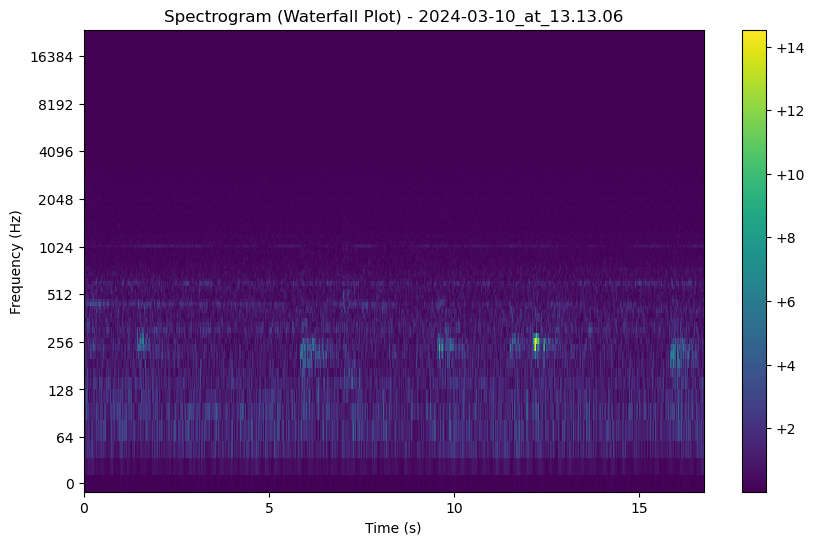

In [2]:
audio_file = 'Audio_2024-03-10_13.13.06.wav'

y, sr = librosa.load(audio_file, sr=None)

# Compute the STFT of the audio signal
D = np.abs(librosa.stft(y))

plt.figure(figsize=(10, 6))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f')
plt.title('Spectrogram (Waterfall Plot) - 2024-03-10_at_13.13.06')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()


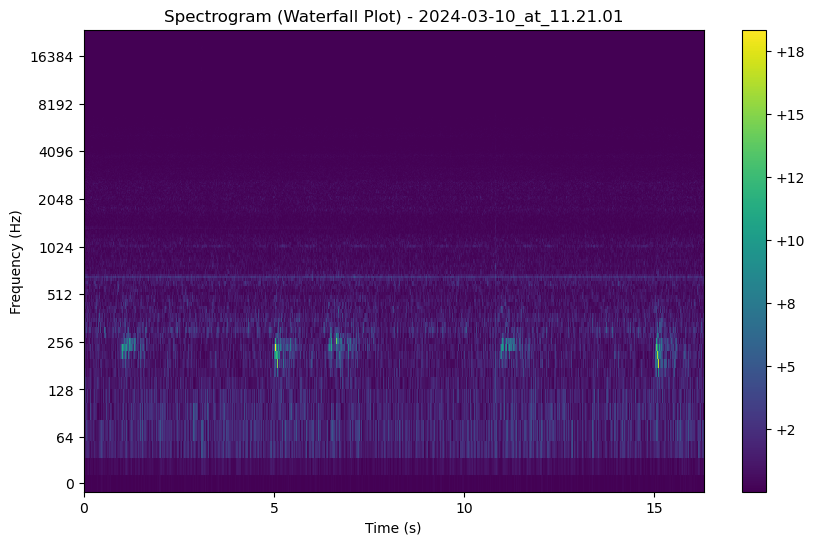

In [3]:
audio_file = 'Audio_2024-03-10_11.21.01.wav'

y, sr = librosa.load(audio_file, sr=None)

# Compute the STFT of the audio signal
D = np.abs(librosa.stft(y))

plt.figure(figsize=(10, 6))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f')
plt.title('Spectrogram (Waterfall Plot) - 2024-03-10_at_11.21.01')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

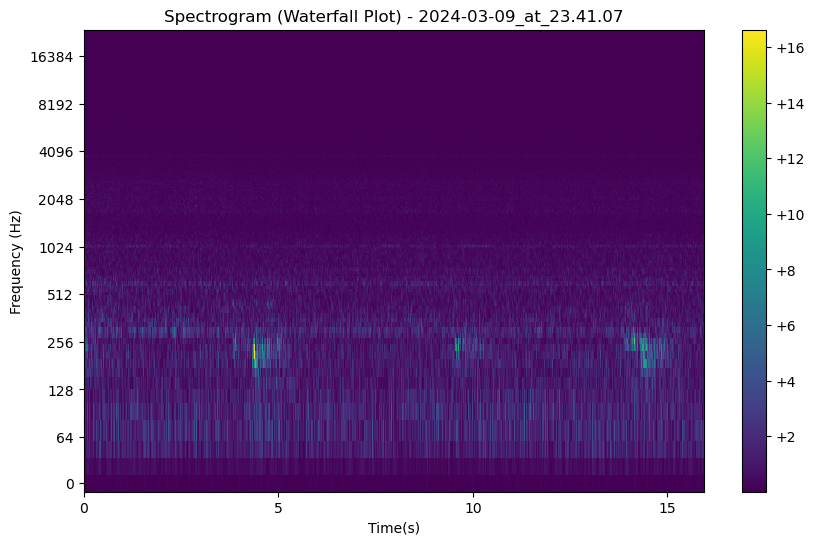

In [4]:
audio_file = 'Audio_2024-03-09_23.41.07.wav'

y, sr = librosa.load(audio_file, sr=None)

# Compute the STFT of the audio signal
D = np.abs(librosa.stft(y))

plt.figure(figsize=(10, 6))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f')
plt.title('Spectrogram (Waterfall Plot) - 2024-03-09_at_23.41.07')
plt.xlabel('Time(s)')
plt.ylabel('Frequency (Hz)')
plt.show()

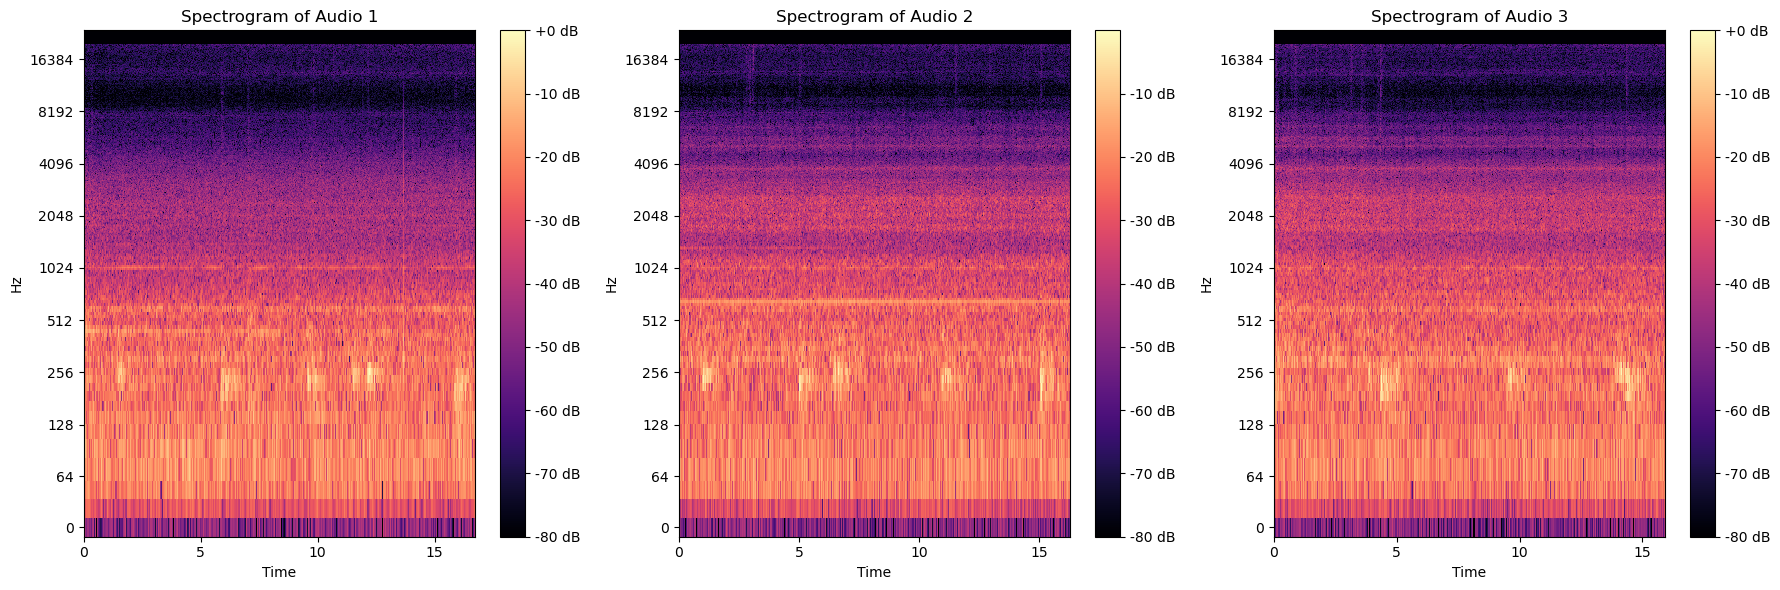

In [5]:
audio_files = ['Audio_2024-03-10_13.13.06.wav', 'Audio_2024-03-10_11.21.01.wav', 'Audio_2024-03-09_23.41.07.wav']

# Initialize lists to hold data
signals = []
sample_rates = []

for file in audio_files:
    y, sr = librosa.load(file, sr=None)
    signals.append(y)
    sample_rates.append(sr)

# Plot the spectrograms for all three audio files side by side - in decibels
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i in range(len(audio_files)):
    y = signals[i]
    sr = sample_rates[i]
    
    # Compute the spectrogram
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    
    # Display the spectrogram
    img = librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', ax=axes[i])
    axes[i].set_title(f'Spectrogram of Audio {i+1}')
    fig.colorbar(img, ax=axes[i], format='%+2.0f dB')

plt.tight_layout()
plt.show()


# 2. FFT of audio files

In this section we compute the simple FFT analyses of the three audio signals, extracted dominant frequency from them and print it. Non of the extracted dominant frequency did not match expexted low frequency heard on the TEA. 

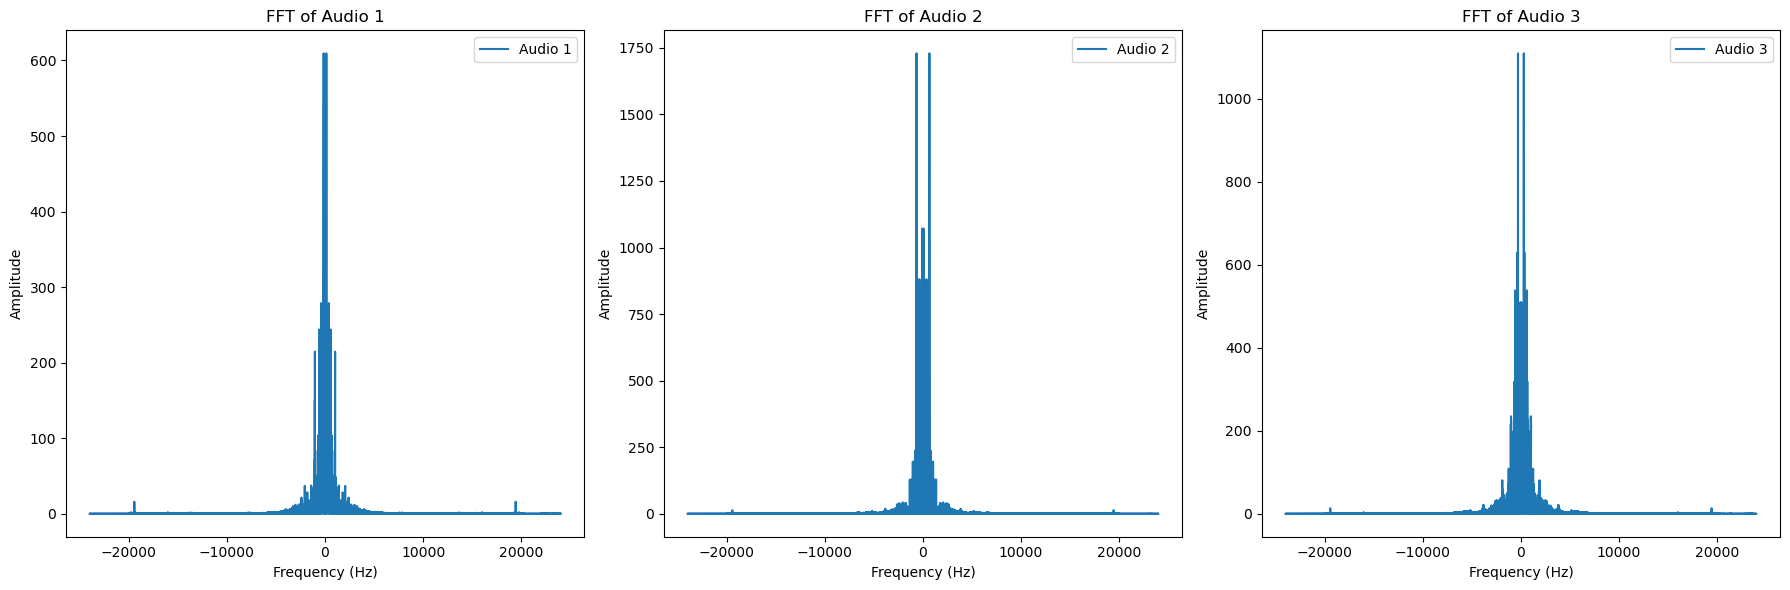

In [6]:
audio_files = ['Audio_2024-03-10_13.13.06.wav', 'Audio_2024-03-10_11.21.01.wav', 'Audio_2024-03-09_23.41.07.wav']


# Initialize lists to hold data
signals = []
sample_rates = []
ffts = []
frequencies = []

# Load each audio file and compute its FFT
for file in audio_files:
    y, sr = librosa.load(file, sr=None)
    signals.append(y)
    sample_rates.append(sr)
    
    # Compute the FFT
    fft = np.fft.fft(y)
    ffts.append(np.abs(fft))
    
    # Compute the frequency bins
    freq = np.fft.fftfreq(len(fft), 1/sr)
    frequencies.append(freq)


fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i in range(len(audio_files)):
    axes[i].plot(frequencies[i], ffts[i], label=f'Audio {i+1}')
    axes[i].set_xlabel('Frequency (Hz)')
    axes[i].set_ylabel('Amplitude')
    axes[i].set_title(f'FFT of Audio {i+1}')
    axes[i].legend()

plt.tight_layout()
plt.show()


Extract dominant Frequency using FFT

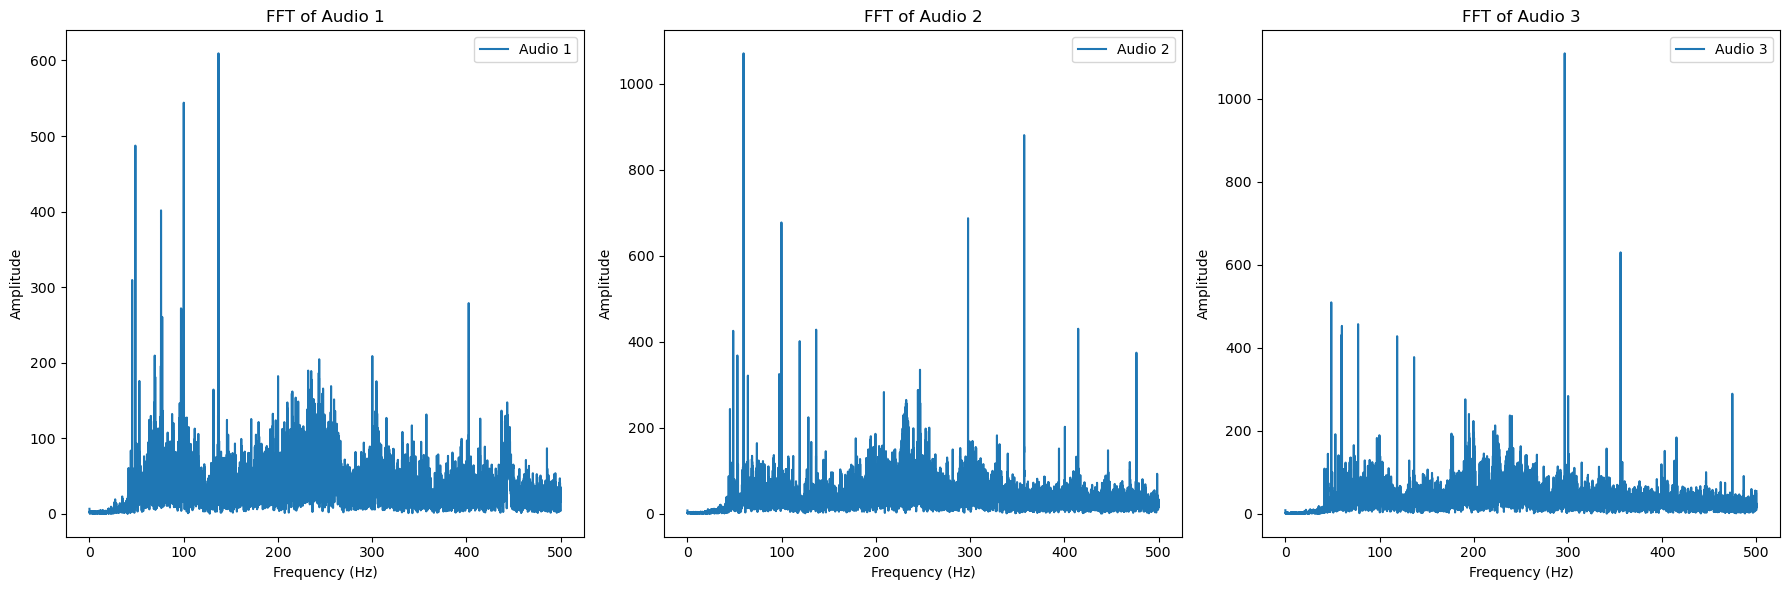

In [7]:
audio_files = ['Audio_2024-03-10_13.13.06.wav', 'Audio_2024-03-10_11.21.01.wav', 'Audio_2024-03-09_23.41.07.wav']

# Initialize lists to hold data
signals = []
sample_rates = []
ffts = []
frequencies = []

# Load each audio file and compute its FFT
for file in audio_files:
    y, sr = librosa.load(file, sr=None)
    signals.append(y)
    sample_rates.append(sr)
    
    # Compute the FFT
    fft = np.fft.fft(y)
    ffts.append(np.abs(fft))
    
    # Compute the frequency bins
    freq = np.fft.fftfreq(len(fft), 1/sr)
    frequencies.append(freq)

# Define the frequency range to zoom in (e.g., 0 to 5000 Hz)
min_freq = 0
max_freq = 500

# Plot the FFTs for all three audio files side by side, zoomed in
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i in range(len(audio_files)):
    # Select the indices corresponding to the desired frequency range
    idx = np.where((frequencies[i] >= min_freq) & (frequencies[i] <= max_freq))
    
    # Plot only the selected frequency range
    axes[i].plot(frequencies[i][idx], ffts[i][idx], label=f'Audio {i+1}')
    axes[i].set_xlabel('Frequency (Hz)')
    axes[i].set_ylabel('Amplitude')
    axes[i].set_title(f'FFT of Audio {i+1}')
    axes[i].legend()

plt.tight_layout()
plt.show()


Print dominant Frequency

Dominant frequency for Audio_2024-03-10_13.13.06.wav: 136.93367306314198 Hz
Dominant frequency for Audio_2024-03-10_11.21.01.wav: 655.2605743270883 Hz
Dominant frequency for Audio_2024-03-09_23.41.07.wav: 296.460547234541 Hz


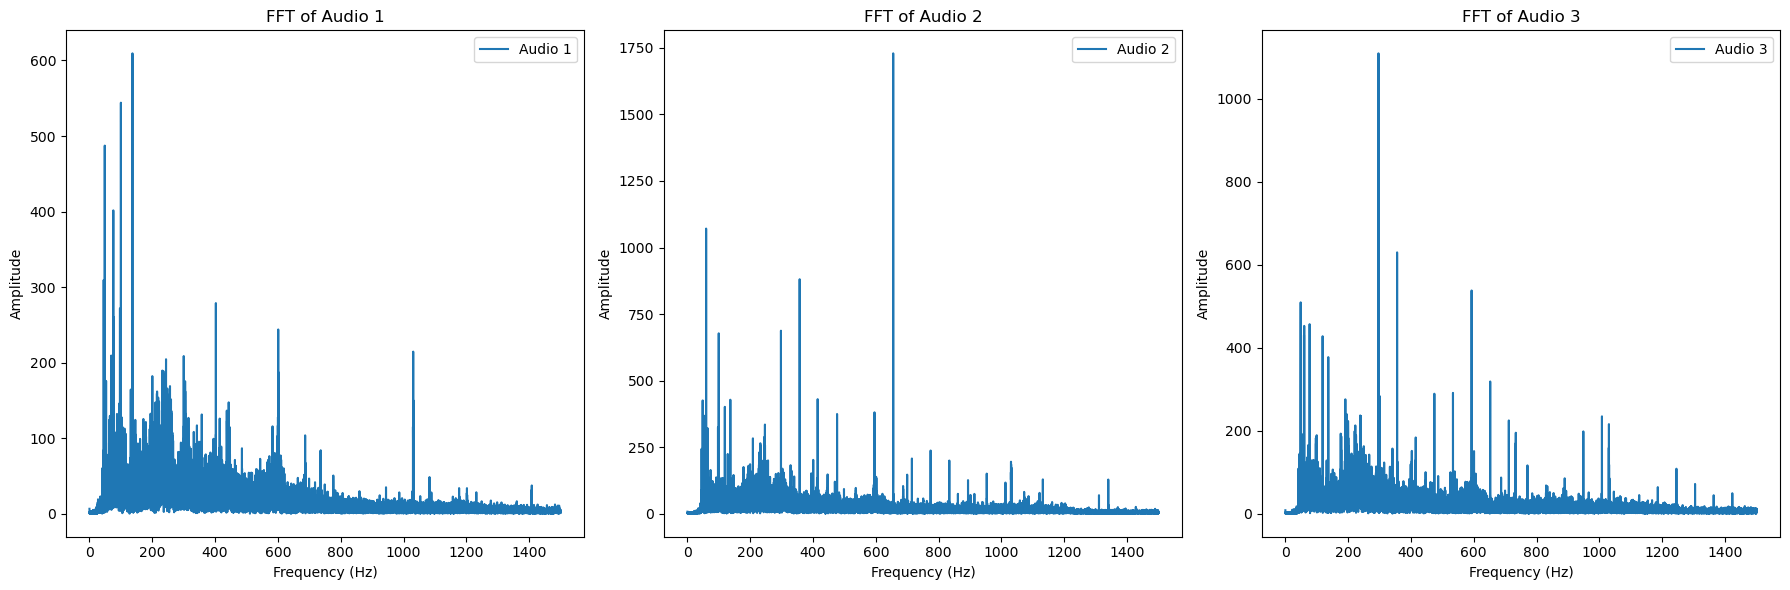

In [8]:
audio_files = ['Audio_2024-03-10_13.13.06.wav', 'Audio_2024-03-10_11.21.01.wav', 'Audio_2024-03-09_23.41.07.wav']

# Initialize lists to hold data
signals = []
sample_rates = []
ffts = []
frequencies = []
dominant_frequencies = []

# Load each audio file and compute its FFT
for file in audio_files:
    y, sr = librosa.load(file, sr=None)
    signals.append(y)
    sample_rates.append(sr)
    
    # Compute the FFT
    fft = np.fft.fft(y)
    ffts.append(np.abs(fft))
    
    # Compute the frequency bins
    freq = np.fft.fftfreq(len(fft), 1/sr)
    frequencies.append(freq)
    
    # Find the dominant frequency
    idx = np.argmax(np.abs(fft))
    dominant_frequency = freq[idx]
    dominant_frequencies.append(dominant_frequency)

    print(f"Dominant frequency for {file}: {dominant_frequency} Hz")

# Define the frequency range to zoom in (e.g., 0 to 5000 Hz)
min_freq = 0
max_freq = 1500

# Plot the FFTs for all three audio files side by side, zoomed in
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i in range(len(audio_files)):
    # Select the indices corresponding to the desired frequency range
    idx = np.where((frequencies[i] >= min_freq) & (frequencies[i] <= max_freq))
    
    # Plot only the selected frequency range
    axes[i].plot(frequencies[i][idx], ffts[i][idx], label=f'Audio {i+1}')
    axes[i].set_xlabel('Frequency (Hz)')
    axes[i].set_ylabel('Amplitude')
    axes[i].set_title(f'FFT of Audio {i+1}')
    axes[i].legend()

plt.tight_layout()
plt.show()


# 3. Short-time FT

In this section we repeated the previous analyses but now using the Short-time FT. The results stay inconclusive

Dominant frequency for Audio_2024-03-10_13.13.06.wav: 187.3170731707317 Hz
Dominant frequency for Audio_2024-03-10_11.21.01.wav: 1311.219512195122 Hz
Dominant frequency for Audio_2024-03-09_23.41.07.wav: 608.780487804878 Hz


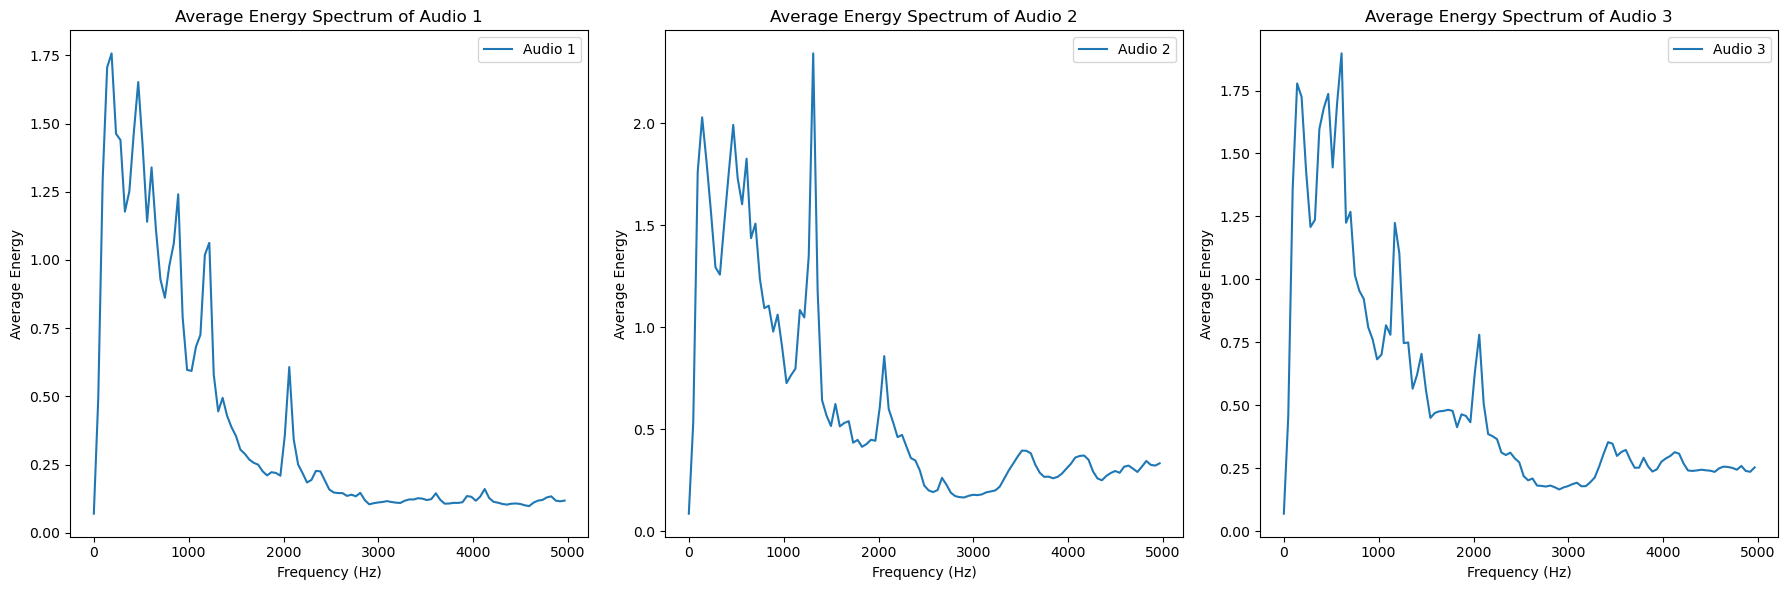

In [9]:
audio_files = ['Audio_2024-03-10_13.13.06.wav', 'Audio_2024-03-10_11.21.01.wav', 'Audio_2024-03-09_23.41.07.wav']

# Initialize lists to hold data
signals = []
sample_rates = []
dominant_frequencies = []

# Load each audio file and compute its spectrogram
for file in audio_files:
    y, sr = librosa.load(file, sr=None)
    signals.append(y)
    sample_rates.append(sr)
    
    # Compute the STFT of the audio signal
    S = np.abs(librosa.stft(y))
    
    # Compute the average energy for each frequency bin
    avg_energy = np.mean(S, axis=1)
    
    # Find the frequency bin with the highest average energy
    dominant_frequency_idx = np.argmax(avg_energy)
    dominant_frequency = librosa.fft_frequencies(sr=sr, n_fft=S.shape[0])[dominant_frequency_idx]
    dominant_frequencies.append(dominant_frequency)
    
    print(f"Dominant frequency for {file}: {dominant_frequency} Hz")

# Define the frequency range to zoom in (e.g., 0 to 5000 Hz)
min_freq = 0
max_freq = 5000

# Plot the average energy spectra for all three audio files side by side, zoomed in
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i in range(len(audio_files)):
    # Compute the STFT of the audio signal again for plotting
    S = np.abs(librosa.stft(signals[i]))
    avg_energy = np.mean(S, axis=1)
    freqs = librosa.fft_frequencies(sr=sample_rates[i], n_fft=S.shape[0])
    
    # Select the indices corresponding to the desired frequency range
    idx = np.where((freqs >= min_freq) & (freqs <= max_freq))
    
    # Plot only the selected frequency range
    axes[i].plot(freqs[idx], avg_energy[idx], label=f'Audio {i+1}')
    axes[i].set_xlabel('Frequency (Hz)')
    axes[i].set_ylabel('Average Energy')
    axes[i].set_title(f'Average Energy Spectrum of Audio {i+1}')
    axes[i].legend()

plt.tight_layout()
plt.show()


# 4. Power spectral density

In this section we try to catch low frequency from the heard audio files using PSD. Again the results did not show the extrems in the low frequency range, even when in zoom-in into the PSD plots.

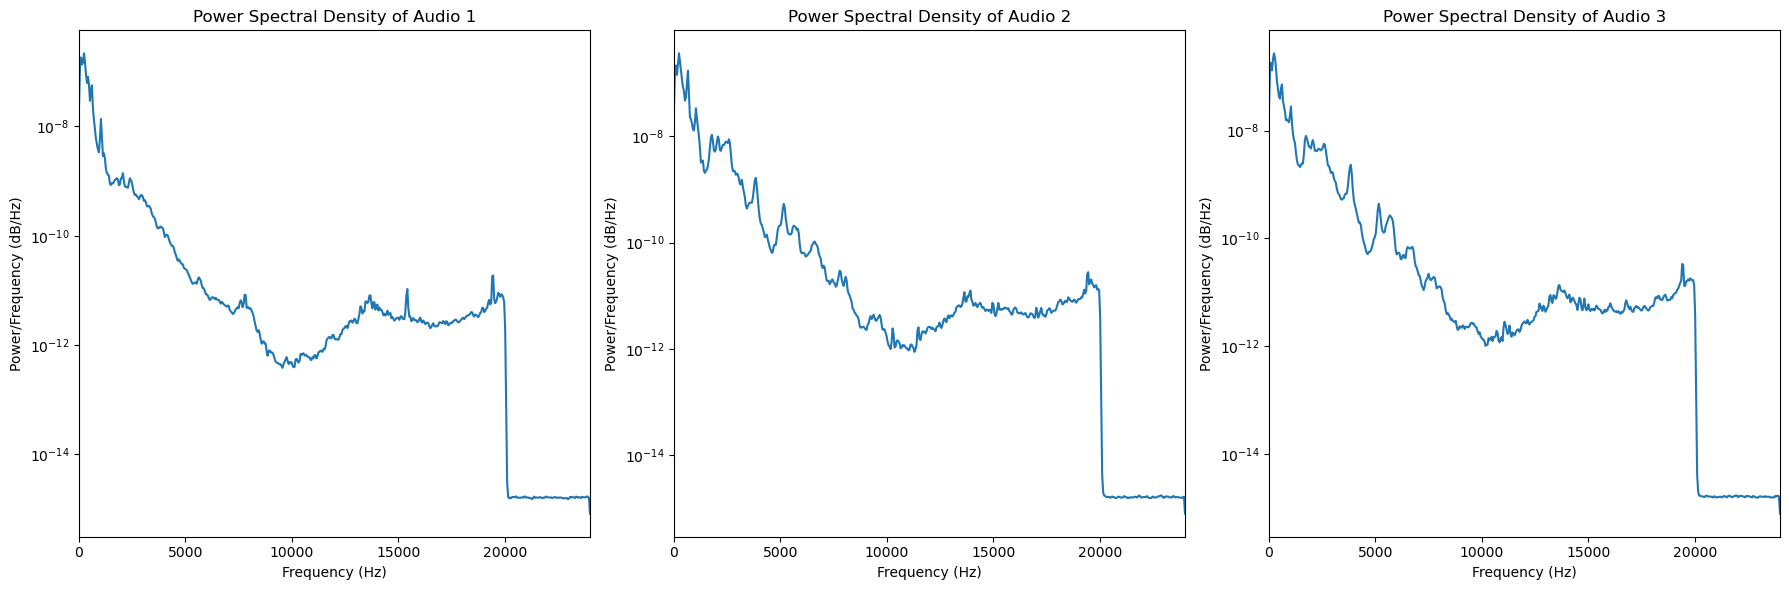

In [11]:
audio_files = ['Audio_2024-03-10_13.13.06.wav', 'Audio_2024-03-10_11.21.01.wav', 'Audio_2024-03-09_23.41.07.wav']

# Initialize lists to hold data
signals = []
sample_rates = []

# Load each audio file
for file in audio_files:
    y, sr = librosa.load(file, sr=None)
    signals.append(y)
    sample_rates.append(sr)

# Define parameters for PSD computation
n_fft = 1024  # Length of the FFT window
n_per_seg = n_fft  # Length of each segment for Welch's method

# Plot the PSDs for all three audio files side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i in range(len(audio_files)):
    y = signals[i]
    sr = sample_rates[i]
    
    # Compute the PSD using Welch's method
    freqs, psd = welch(y, fs=sr, nperseg=n_per_seg)
    
    # Plot the PSD
    axes[i].semilogy(freqs, psd)
    axes[i].set_title(f'Power Spectral Density of Audio {i+1}')
    axes[i].set_xlabel('Frequency (Hz)')
    axes[i].set_ylabel('Power/Frequency (dB/Hz)')
    axes[i].set_xlim([0, sr/2])
    
plt.tight_layout()
plt.show()


Zoom in PSD

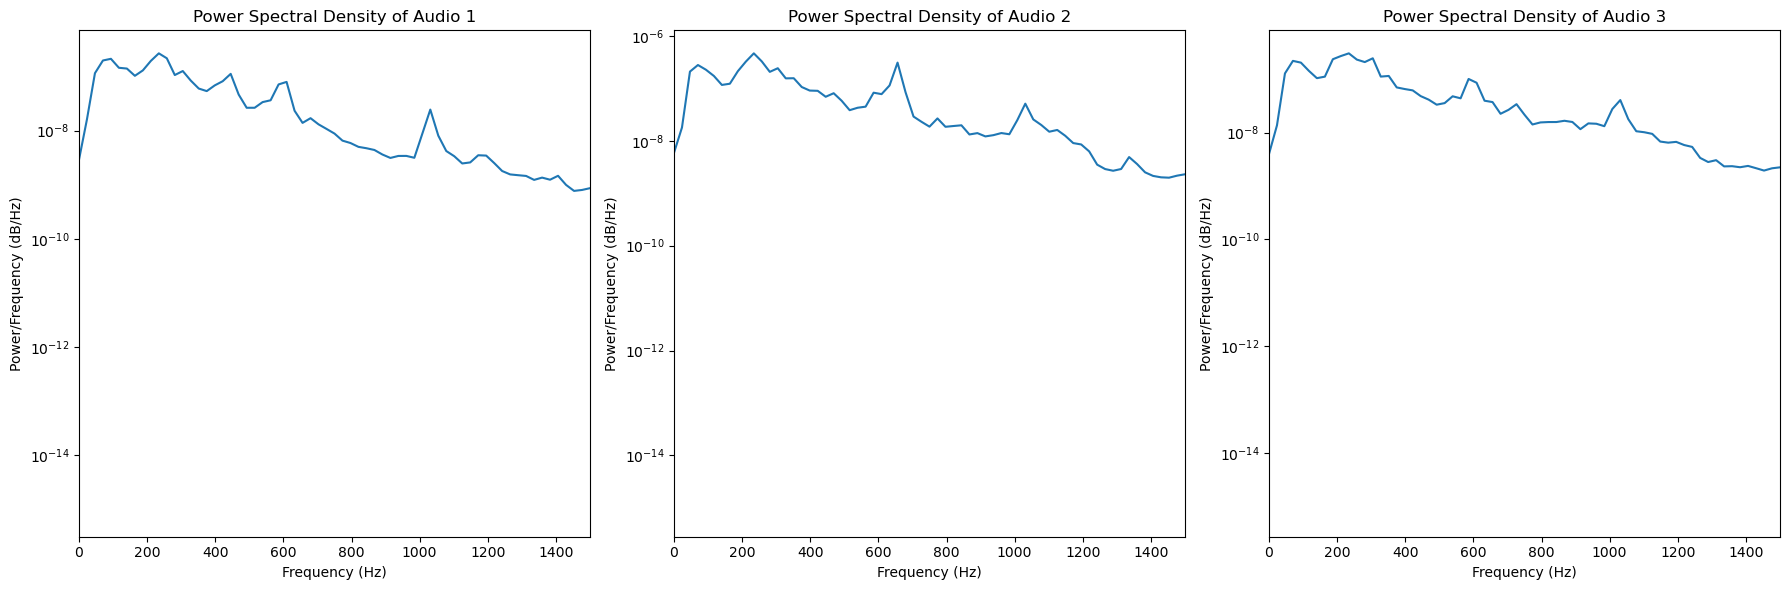

In [12]:
audio_files = ['Audio_2024-03-10_13.13.06.wav', 'Audio_2024-03-10_11.21.01.wav', 'Audio_2024-03-09_23.41.07.wav']

# Initialize lists to hold data
signals = []
sample_rates = []

# Load each audio file
for file in audio_files:
    y, sr = librosa.load(file, sr=None)
    signals.append(y)
    sample_rates.append(sr)

# Define parameters for PSD computation
n_fft = 2048  # Length of the FFT window
n_per_seg = n_fft  # Length of each segment for Welch's method

# Define the frequency range for zooming in
low_freq = 0
high_freq = 1500

# Plot the PSDs for all three audio files side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i in range(len(audio_files)):
    y = signals[i]
    sr = sample_rates[i]
    
    # Compute the PSD using Welch's method
    freqs, psd = welch(y, fs=sr, nperseg=n_per_seg)
    
    # Plot the PSD
    axes[i].semilogy(freqs, psd)
    axes[i].set_title(f'Power Spectral Density of Audio {i+1}')
    axes[i].set_xlabel('Frequency (Hz)')
    axes[i].set_ylabel('Power/Frequency (dB/Hz)')
    
    # Zoom in to the specific frequency range
    axes[i].set_xlim([low_freq, high_freq])
    
plt.tight_layout()
plt.show()


# 5. Extract background noise

Here we try to denoised the three signals and to repeat some of the previous analyses. We used first one second of the video as model for the background noise. The results of all the analyses on the denoised sygnals stay inconclusive.

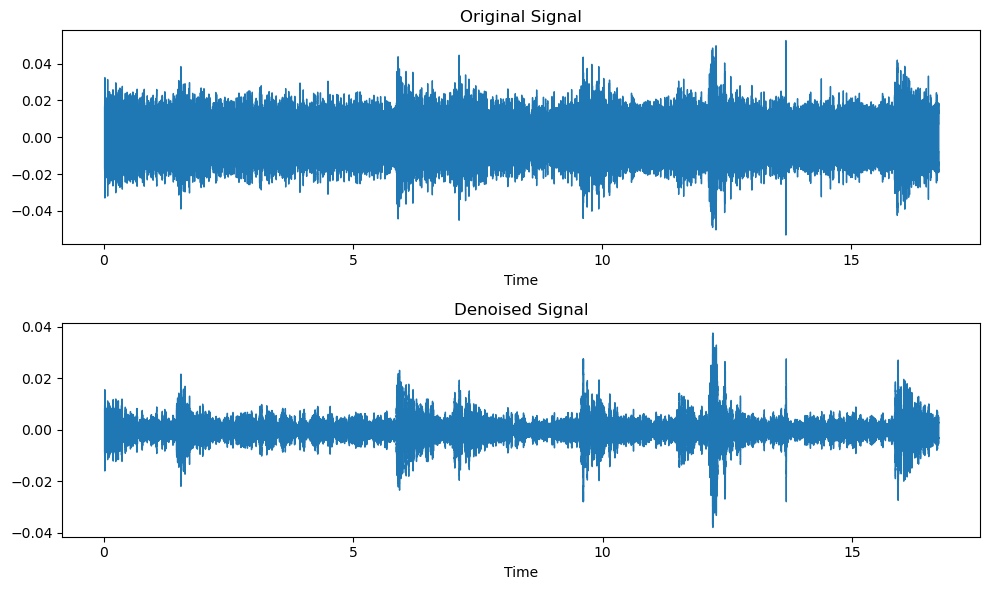

In [13]:
audio_file = './Audio_2024-03-10_13.13.06.wav'
y, sr = librosa.load(audio_file, sr=None)

# Assume that the first second of the audio are just noise
noise_duration = 1.0  # seconds
noise_sample = int(noise_duration * sr)
noise_profile = y[:noise_sample]

# Compute the STFT of the audio signal
D = librosa.stft(y)
D_noise = librosa.stft(noise_profile)

# Compute the average spectrum of the noise
mean_noise_spectrum = np.mean(np.abs(D_noise), axis=1, keepdims=True)

# Subtract the noise spectrum from the signal's spectrum
D_denoised = np.abs(D) - mean_noise_spectrum

# Prevent negative values in the spectrum
D_denoised = np.maximum(D_denoised, 0)

# Convert the denoised spectrum back to time domain
y_denoised = librosa.istft(D_denoised * np.exp(1.j * np.angle(D)))

# Plot the original and denoised signals
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Original Signal')

plt.subplot(2, 1, 2)
librosa.display.waveshow(y_denoised, sr=sr)
plt.title('Denoised Signal')

plt.tight_layout()
plt.show()

# Save the denoised signal using soundfile
sf.write('denoised_2024-03-10_at_13.13.06_audio.wav', y_denoised, sr)


Spectrogram of the denoised audio 1

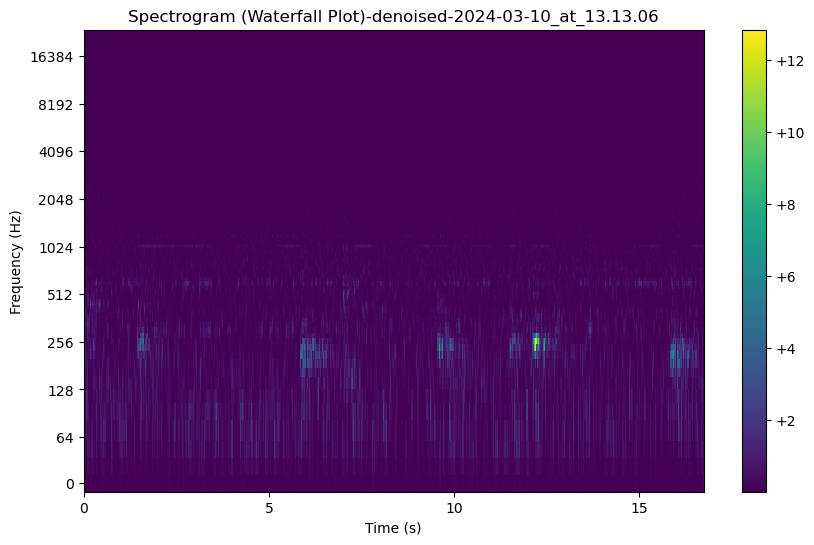

In [14]:
audio_file = 'denoised_2024-03-10_at_13.13.06_audio.wav'

y, sr = librosa.load(audio_file, sr=None)

# Compute the STFT of the audio signal
D = np.abs(librosa.stft(y))

plt.figure(figsize=(10, 6))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f')
plt.title('Spectrogram (Waterfall Plot)-denoised-2024-03-10_at_13.13.06')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

Original signal VS denoised signal - spectrograms

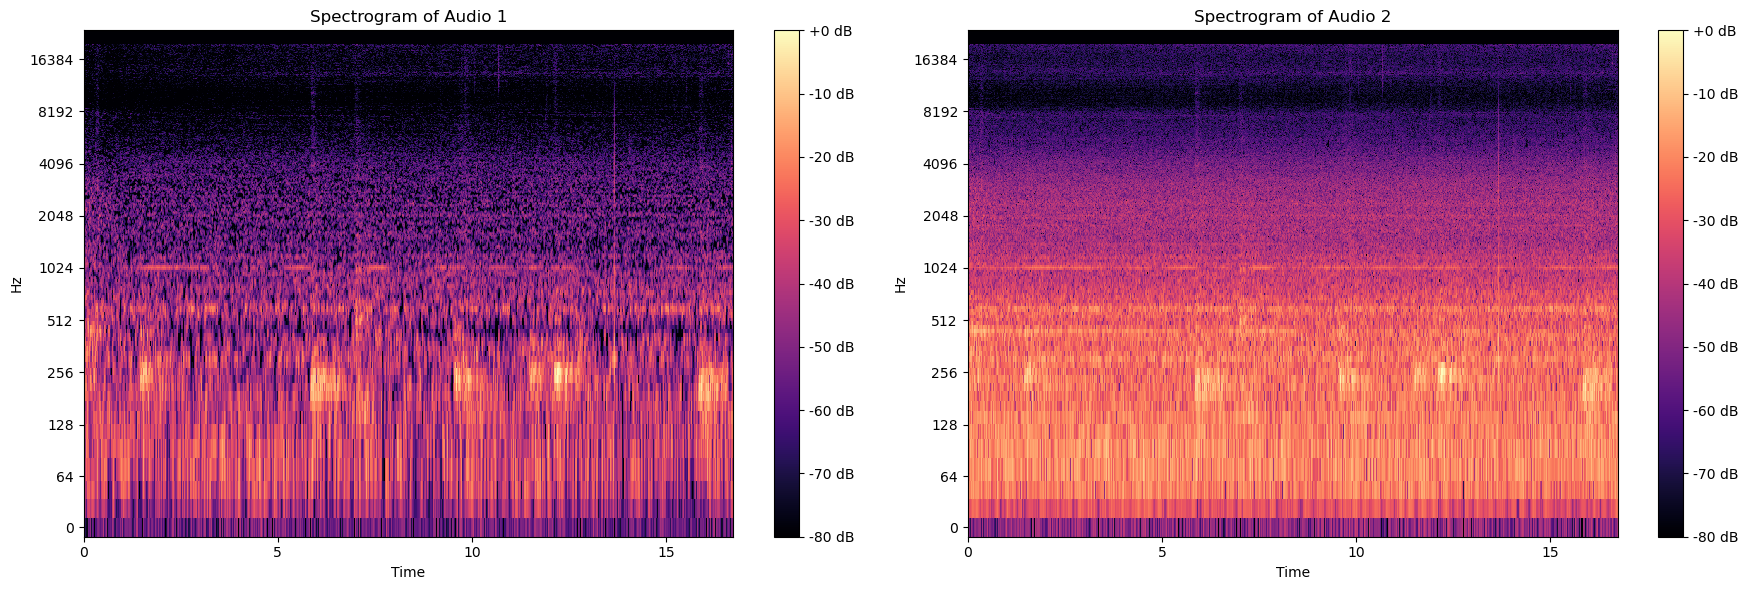

In [15]:
audio_files = ['denoised_2024-03-10_at_13.13.06_audio.wav', 'Audio_2024-03-10_13.13.06.wav']

# Initialize lists to hold data
signals = []
sample_rates = []

# Load each audio file
for file in audio_files:
    y, sr = librosa.load(file, sr=None)
    signals.append(y)
    sample_rates.append(sr)

# Plot the spectrograms for all three audio files side by side - in decibels
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

for i in range(len(audio_files)):
    y = signals[i]
    sr = sample_rates[i]
    
    # Compute the spectrogram
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    
    # Display the spectrogram
    img = librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', ax=axes[i])
    axes[i].set_title(f'Spectrogram of Audio {i+1}')
    fig.colorbar(img, ax=axes[i], format='%+2.0f dB')

plt.tight_layout()
plt.show()

FFt of denoised signal and dominant fq

Dominant frequency for denoised_2024-03-10_at_13.13.06_audio.wav: 48.69741873804971 Hz
Dominant frequency for Audio_2024-03-10_13.13.06.wav: 136.93367306314198 Hz


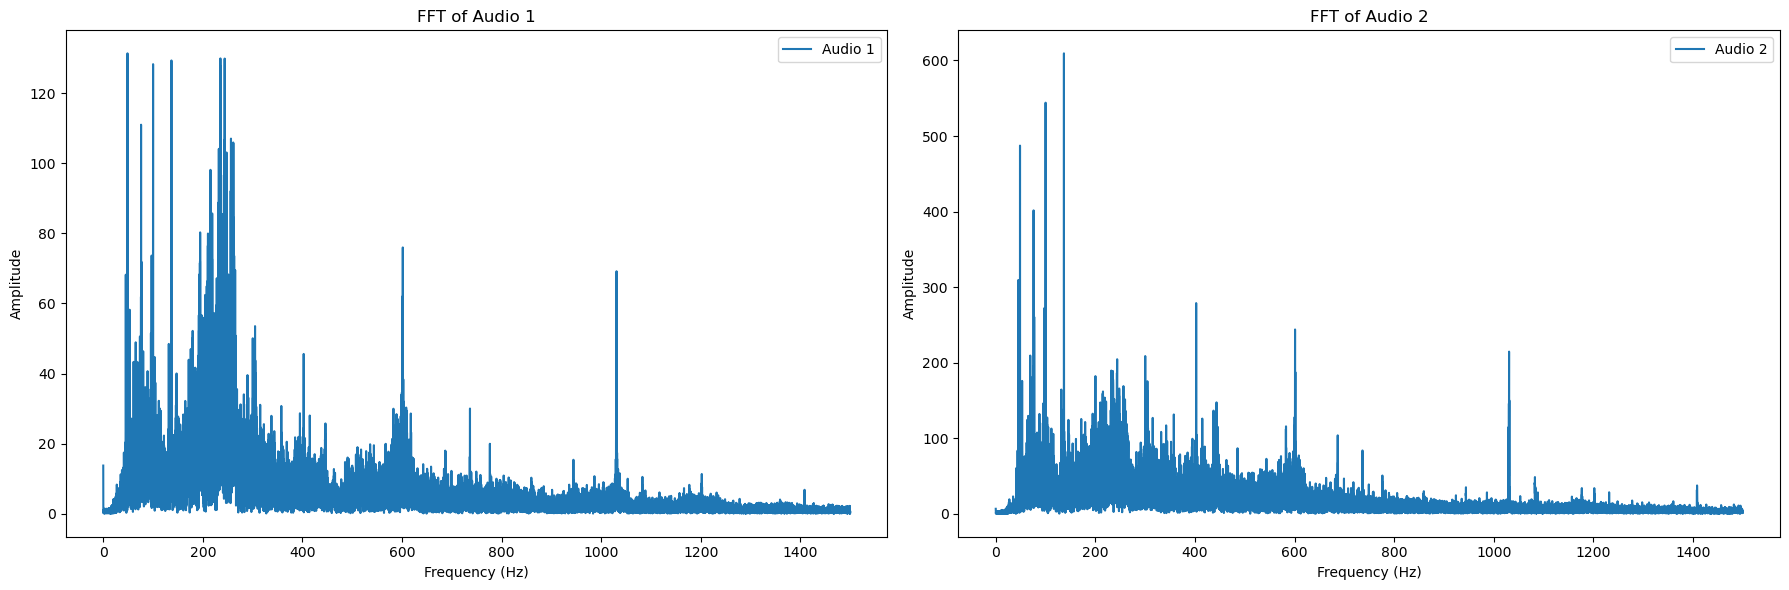

In [16]:
audio_files = ['denoised_2024-03-10_at_13.13.06_audio.wav', 'Audio_2024-03-10_13.13.06.wav']

# Initialize lists to hold data
signals = []
sample_rates = []
ffts = []
frequencies = []
dominant_frequencies = []

# Load each audio file and compute its FFT
for file in audio_files:
    y, sr = librosa.load(file, sr=None)
    signals.append(y)
    sample_rates.append(sr)
    
    # Compute the FFT
    fft = np.fft.fft(y)
    ffts.append(np.abs(fft))
    
    # Compute the frequency bins
    freq = np.fft.fftfreq(len(fft), 1/sr)
    frequencies.append(freq)
    
    # Find the dominant frequency
    idx = np.argmax(np.abs(fft))
    dominant_frequency = freq[idx]
    dominant_frequencies.append(dominant_frequency)

    print(f"Dominant frequency for {file}: {dominant_frequency} Hz")

# Define the frequency range to zoom in (e.g., 0 to 5000 Hz)
min_freq = 0
max_freq = 1500

# Plot the FFTs for all three audio files side by side, zoomed in
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

for i in range(len(audio_files)):
    # Select the indices corresponding to the desired frequency range
    idx = np.where((frequencies[i] >= min_freq) & (frequencies[i] <= max_freq))
    
    # Plot only the selected frequency range
    axes[i].plot(frequencies[i][idx], ffts[i][idx], label=f'Audio {i+1}')
    axes[i].set_xlabel('Frequency (Hz)')
    axes[i].set_ylabel('Amplitude')
    axes[i].set_title(f'FFT of Audio {i+1}')
    axes[i].legend()

plt.tight_layout()
plt.show()

Second audio - Audio_2024-03-10_11.21.01.wav

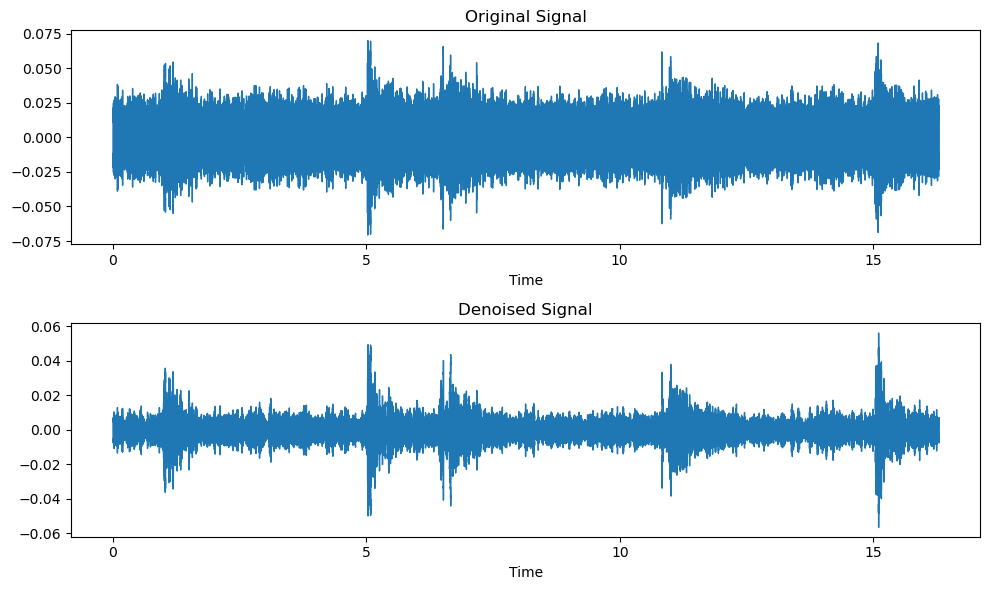

In [17]:
audio_file = './Audio_2024-03-10_11.21.01.wav'
y, sr = librosa.load(audio_file, sr=None)

# Assume that the first second of the audio are just noise
noise_duration = 1.0  # seconds
noise_sample = int(noise_duration * sr)
noise_profile = y[:noise_sample]

# Compute the STFT of the audio signal
D = librosa.stft(y)
D_noise = librosa.stft(noise_profile)

# Compute the average spectrum of the noise
mean_noise_spectrum = np.mean(np.abs(D_noise), axis=1, keepdims=True)

# Subtract the noise spectrum from the signal's spectrum
D_denoised = np.abs(D) - mean_noise_spectrum

# Prevent negative values in the spectrum
D_denoised = np.maximum(D_denoised, 0)

# Convert the denoised spectrum back to time domain
y_denoised = librosa.istft(D_denoised * np.exp(1.j * np.angle(D)))

# Plot the original and denoised signals
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Original Signal')

plt.subplot(2, 1, 2)
librosa.display.waveshow(y_denoised, sr=sr)
plt.title('Denoised Signal')

plt.tight_layout()
plt.show()

# Save the denoised signal using soundfile
sf.write('denoised_2024-03-10_at_11.21.01_audio.wav', y_denoised, sr)


Spectrogram of the second denoised audio

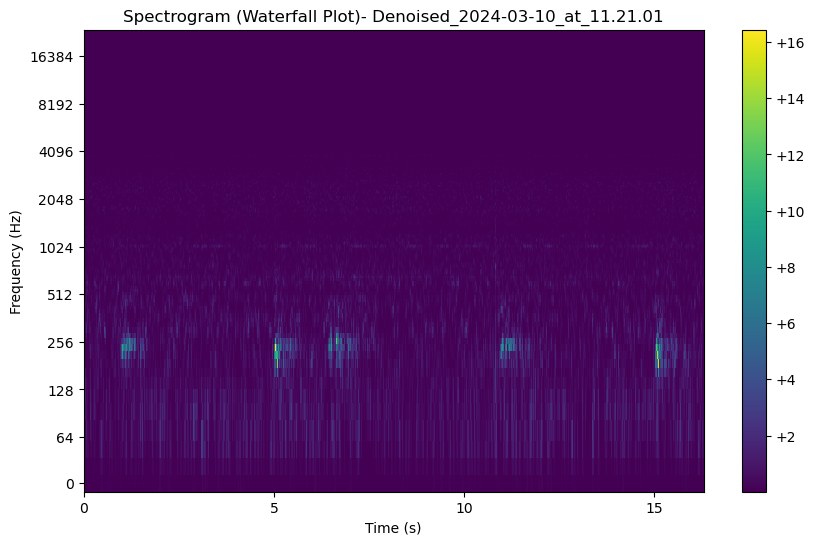

In [19]:
audio_file = 'denoised_2024-03-10_at_11.21.01_audio.wav'

y, sr = librosa.load(audio_file, sr=None)

# Compute the STFT of the audio signal
D = np.abs(librosa.stft(y))

plt.figure(figsize=(10, 6))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f')
plt.title('Spectrogram (Waterfall Plot)- Denoised_2024-03-10_at_11.21.01')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

Spectrograms: denoised audio VS original - second audio

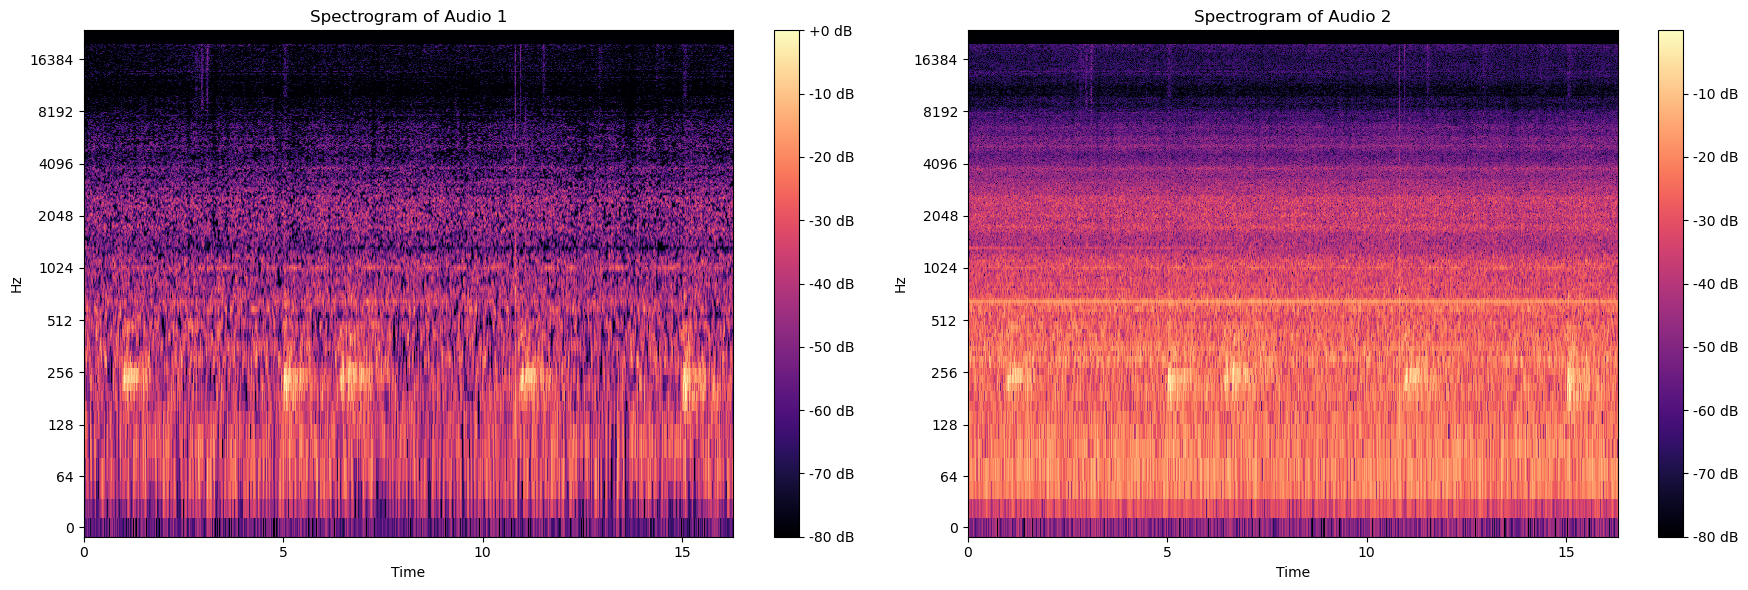

In [20]:
audio_files = ['denoised_2024-03-10_at_11.21.01_audio.wav', 'Audio_2024-03-10_11.21.01.wav']

# Initialize lists to hold data
signals = []
sample_rates = []

# Load each audio file
for file in audio_files:
    y, sr = librosa.load(file, sr=None)
    signals.append(y)
    sample_rates.append(sr)

# Plot the spectrograms for all three audio files side by side - in decibels
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

for i in range(len(audio_files)):
    y = signals[i]
    sr = sample_rates[i]
    
    # Compute the spectrogram
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    
    # Display the spectrogram
    img = librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', ax=axes[i])
    axes[i].set_title(f'Spectrogram of Audio {i+1}')
    fig.colorbar(img, ax=axes[i], format='%+2.0f dB')

plt.tight_layout()
plt.show()

FFT denoised VS original - second audio

Dominant frequency for denoised_2024-03-10_at_11.21.01_audio.wav: 59.553045186640475 Hz
Dominant frequency for Audio_2024-03-10_11.21.01.wav: 655.2605743270883 Hz


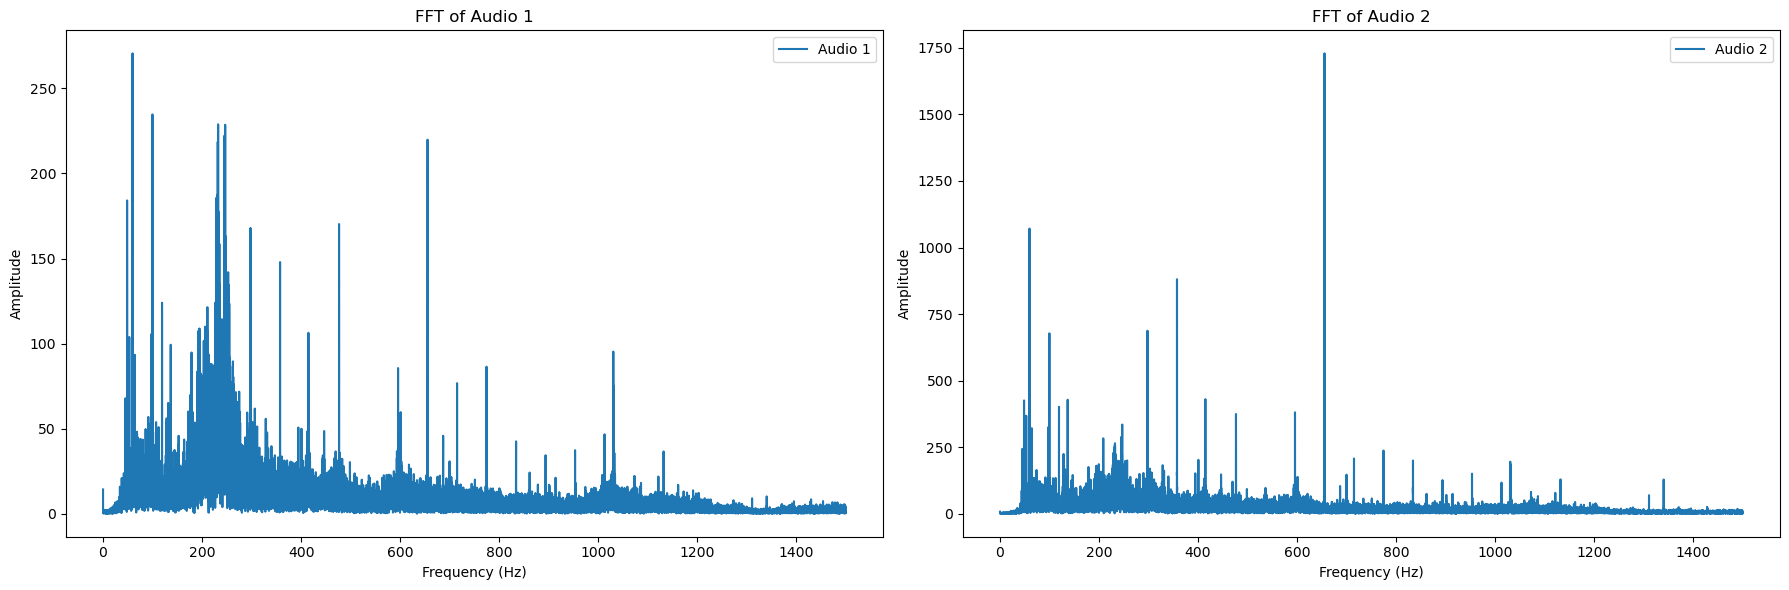

In [21]:
audio_files = ['denoised_2024-03-10_at_11.21.01_audio.wav', 'Audio_2024-03-10_11.21.01.wav']


# Initialize lists to hold data
signals = []
sample_rates = []
ffts = []
frequencies = []
dominant_frequencies = []

# Load each audio file and compute its FFT
for file in audio_files:
    y, sr = librosa.load(file, sr=None)
    signals.append(y)
    sample_rates.append(sr)
    
    # Compute the FFT
    fft = np.fft.fft(y)
    ffts.append(np.abs(fft))
    
    # Compute the frequency bins
    freq = np.fft.fftfreq(len(fft), 1/sr)
    frequencies.append(freq)
    
    # Find the dominant frequency
    idx = np.argmax(np.abs(fft))
    dominant_frequency = freq[idx]
    dominant_frequencies.append(dominant_frequency)

    print(f"Dominant frequency for {file}: {dominant_frequency} Hz")

# Define the frequency range to zoom in (e.g., 0 to 5000 Hz)
min_freq = 0
max_freq = 1500

# Plot the FFTs for all three audio files side by side, zoomed in
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

for i in range(len(audio_files)):
    # Select the indices corresponding to the desired frequency range
    idx = np.where((frequencies[i] >= min_freq) & (frequencies[i] <= max_freq))
    
    # Plot only the selected frequency range
    axes[i].plot(frequencies[i][idx], ffts[i][idx], label=f'Audio {i+1}')
    axes[i].set_xlabel('Frequency (Hz)')
    axes[i].set_ylabel('Amplitude')
    axes[i].set_title(f'FFT of Audio {i+1}')
    axes[i].legend()

plt.tight_layout()
plt.show()

Third audio Audio_2024-03-09_23.41.07.wav

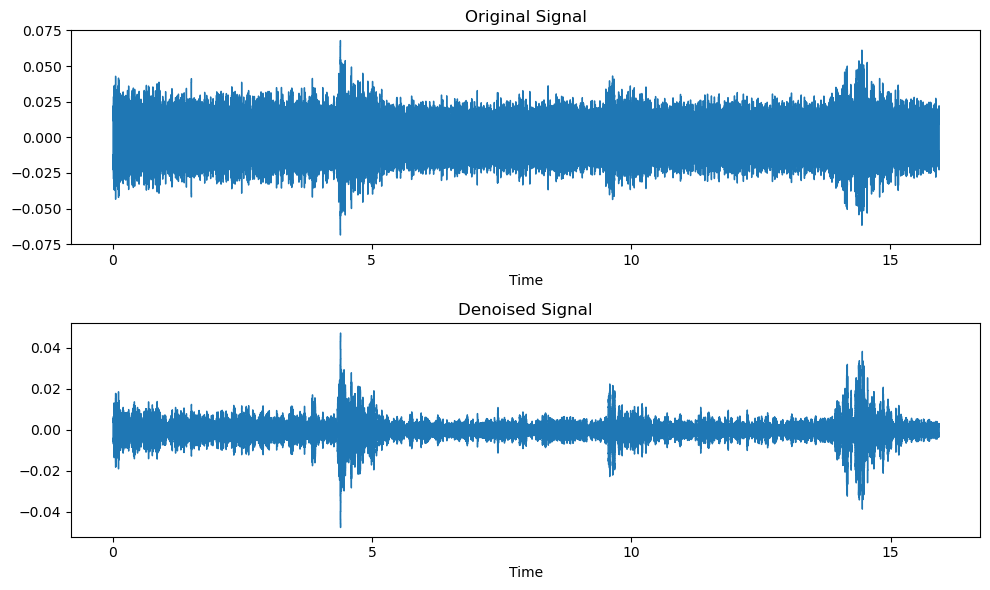

In [22]:
audio_file = './Audio_2024-03-09_23.41.07.wav'
y, sr = librosa.load(audio_file, sr=None)

# Assume that the first few seconds of the audio are just noise
noise_duration = 1.0  # seconds
noise_sample = int(noise_duration * sr)
noise_profile = y[:noise_sample]

# Compute the STFT of the audio signal
D = librosa.stft(y)
D_noise = librosa.stft(noise_profile)

# Compute the average spectrum of the noise
mean_noise_spectrum = np.mean(np.abs(D_noise), axis=1, keepdims=True)

# Subtract the noise spectrum from the signal's spectrum
D_denoised = np.abs(D) - mean_noise_spectrum

# Prevent negative values in the spectrum
D_denoised = np.maximum(D_denoised, 0)

# Convert the denoised spectrum back to time domain
y_denoised = librosa.istft(D_denoised * np.exp(1.j * np.angle(D)))

# Plot the original and denoised signals
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Original Signal')

plt.subplot(2, 1, 2)
librosa.display.waveshow(y_denoised, sr=sr)
plt.title('Denoised Signal')

plt.tight_layout()
plt.show()

# Save the denoised signal using soundfile
sf.write('denoised_2024-03-09_at_23.41.07_audio.wav', y_denoised, sr)

Spectrogram of the third denoised audio

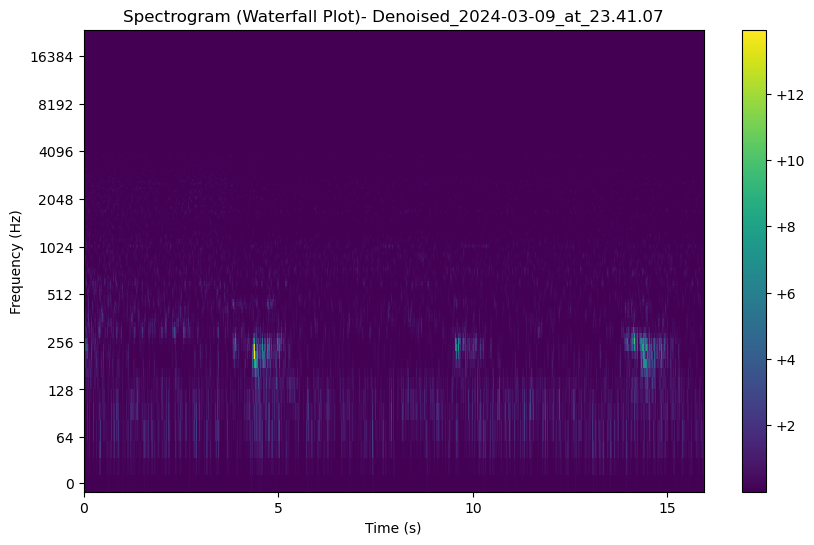

In [23]:
audio_file = 'denoised_2024-03-09_at_23.41.07_audio.wav'

y, sr = librosa.load(audio_file, sr=None)

# Compute the STFT of the audio signal
D = np.abs(librosa.stft(y))

plt.figure(figsize=(10, 6))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f')
plt.title('Spectrogram (Waterfall Plot)- Denoised_2024-03-09_at_23.41.07')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

Spectrogram of denoised VS original audio - third audio

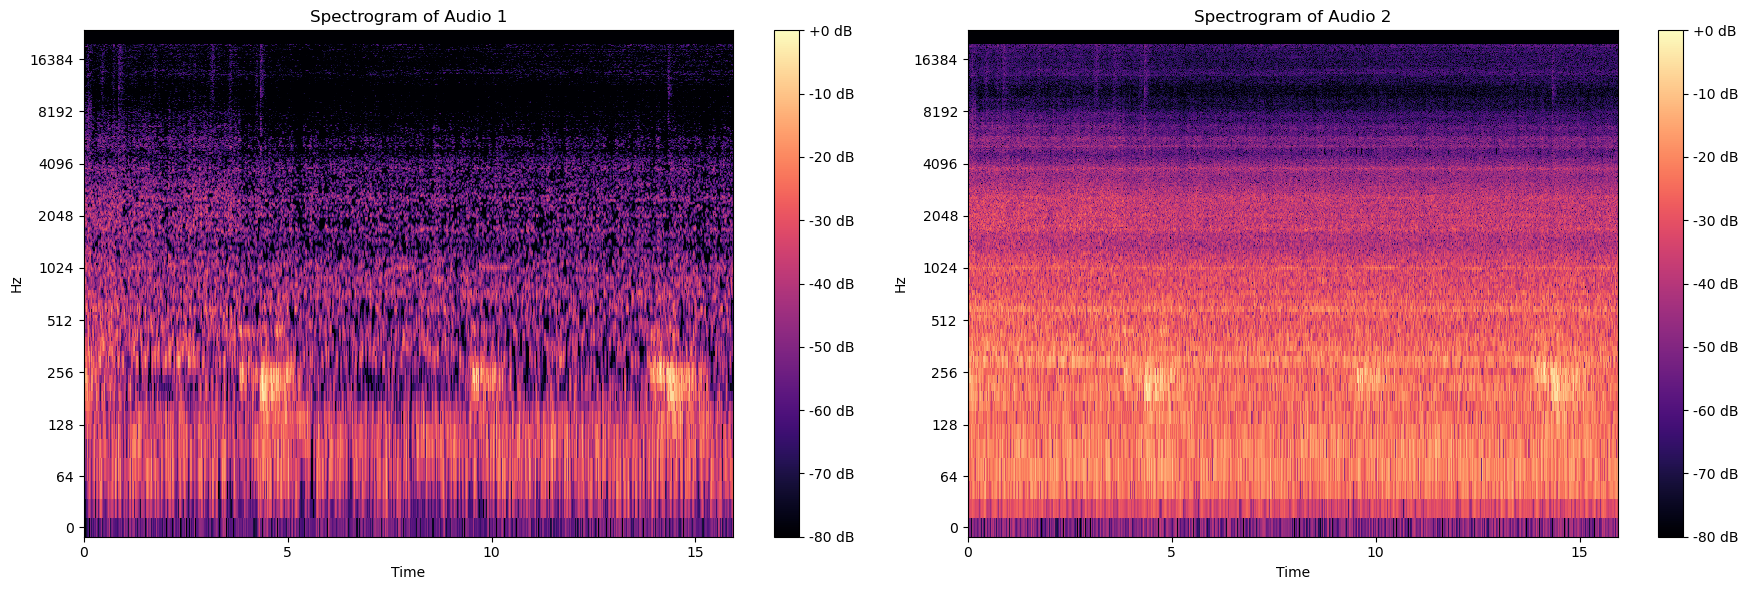

In [24]:
audio_files = ['denoised_2024-03-09_at_23.41.07_audio.wav', 'Audio_2024-03-09_23.41.07.wav']

# Initialize lists to hold data
signals = []
sample_rates = []

# Load each audio file
for file in audio_files:
    y, sr = librosa.load(file, sr=None)
    signals.append(y)
    sample_rates.append(sr)

# Plot the spectrograms for all three audio files side by side - in decibels
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

for i in range(len(audio_files)):
    y = signals[i]
    sr = sample_rates[i]
    
    # Compute the spectrogram
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    
    # Display the spectrogram
    img = librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', ax=axes[i])
    axes[i].set_title(f'Spectrogram of Audio {i+1}')
    fig.colorbar(img, ax=axes[i], format='%+2.0f dB')

plt.tight_layout()
plt.show()

FFT of the original and denoised third audio

Dominant frequency for denoised_2024-03-09_at_23.41.07_audio.wav: -77.1726389819156 Hz
Dominant frequency for Audio_2024-03-09_23.41.07.wav: 296.460547234541 Hz


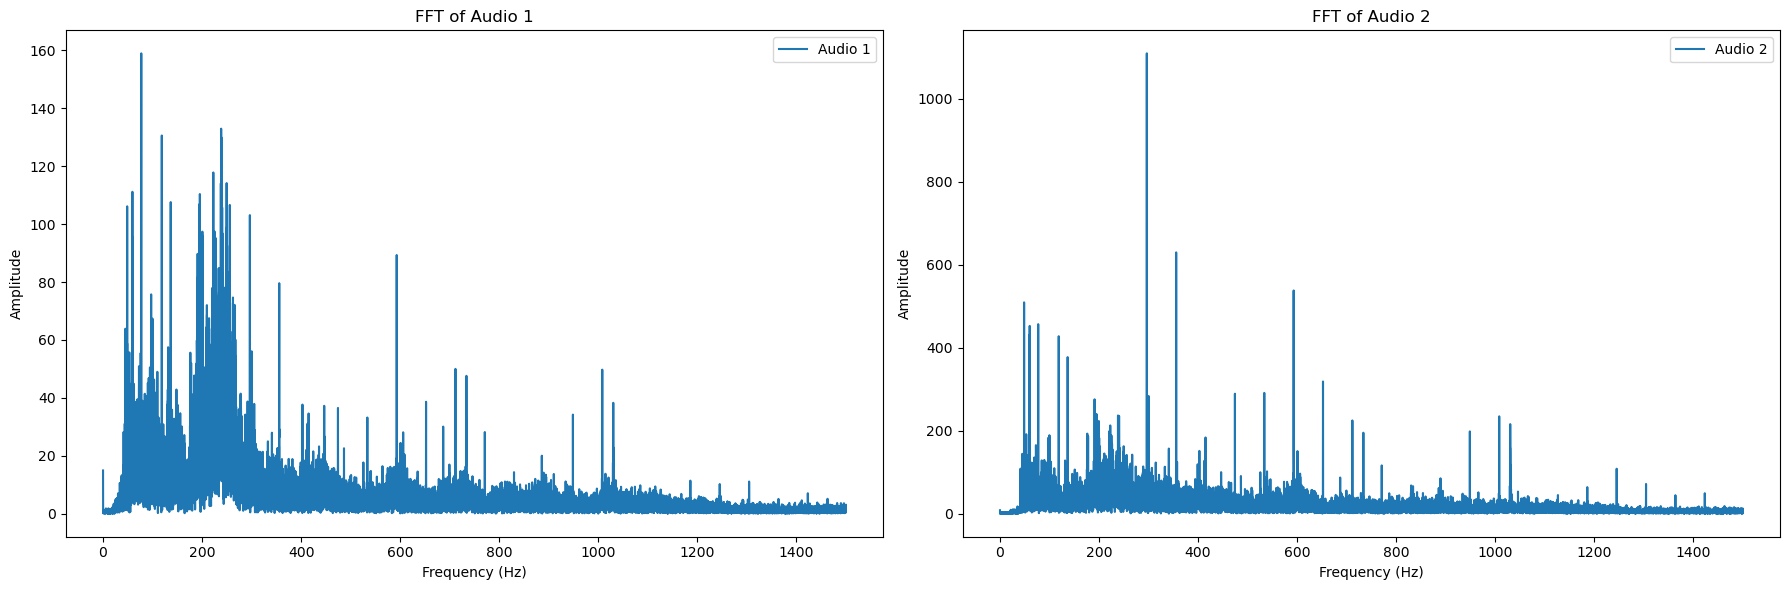

In [25]:
audio_files = ['denoised_2024-03-09_at_23.41.07_audio.wav', 'Audio_2024-03-09_23.41.07.wav']

# Initialize lists to hold data
signals = []
sample_rates = []
ffts = []
frequencies = []
dominant_frequencies = []

# Load each audio file and compute its FFT
for file in audio_files:
    y, sr = librosa.load(file, sr=None)
    signals.append(y)
    sample_rates.append(sr)
    
    # Compute the FFT
    fft = np.fft.fft(y)
    ffts.append(np.abs(fft))
    
    # Compute the frequency bins
    freq = np.fft.fftfreq(len(fft), 1/sr)
    frequencies.append(freq)
    
    # Find the dominant frequency
    idx = np.argmax(np.abs(fft))
    dominant_frequency = freq[idx]
    dominant_frequencies.append(dominant_frequency)

    print(f"Dominant frequency for {file}: {dominant_frequency} Hz")

# Define the frequency range to zoom in (e.g., 0 to 5000 Hz)
min_freq = 0
max_freq = 1500

# Plot the FFTs for all three audio files side by side, zoomed in
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

for i in range(len(audio_files)):
    # Select the indices corresponding to the desired frequency range
    idx = np.where((frequencies[i] >= min_freq) & (frequencies[i] <= max_freq))
    
    # Plot only the selected frequency range
    axes[i].plot(frequencies[i][idx], ffts[i][idx], label=f'Audio {i+1}')
    axes[i].set_xlabel('Frequency (Hz)')
    axes[i].set_ylabel('Amplitude')
    axes[i].set_title(f'FFT of Audio {i+1}')
    axes[i].legend()

plt.tight_layout()
plt.show()